<a href="https://colab.research.google.com/github/AjeelAhmed1998/ML_iot_dataset/blob/master/ML_io_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datacleaner

  Created wheel for datacleaner: filename=datacleaner-0.1.5-cp36-none-any.whl size=7412 sha256=7837755e1deaa73c5f372cae1da081d8d2f1f062256f8c7dac30fef264e580db
  Stored in directory: /root/.cache/pip/wheels/47/e3/74/4e055e42b3d4a5deab827f4d950e8e71d506c6e79231ad4576
Successfully built datacleaner


In [3]:
#all imports come in here 
import pandas as pd
import seaborn as sns

from datacleaner import autoclean

# import numpy as np
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import sklearn
# from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
n_df = pd.read_csv("/content/drive/My Drive/Copy of IoTID20.csv")
n_df.head()
troubling_features = ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Flow_Byts/s', 'Flow_Pkts/s']
n_df.drop(troubling_features, axis=1, inplace=True)
n_df.head()
# print(n_df.iloc[0,0])

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
# some_ip = 192.134.156.90
# some_num = int(some_ip)
# print(some_num)
newdf = pd.read_csv("/content/drive/My Drive/Copy of IoTID20.csv")
newdf.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
#dataset loading 
df = pd.read_csv("/content/drive/My Drive/Copy of IoTID20.csv")
flow_bytes = ['Flow_Byts/s']
df.drop(flow_bytes, axis = 1 , inplace=True)
df = autoclean(df)
df.head()

# print(type(df.Label))
# print(type(df.Label[0]))

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,10000,203,10101,17,3496,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,22760,34617,2179,200,554,6,3664,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,12691,25886,52727,200,9020,6,2082,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,12704,25886,52964,200,9020,6,791,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,611,25881,36763,317,1900,17,1040,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


26666.66666666667


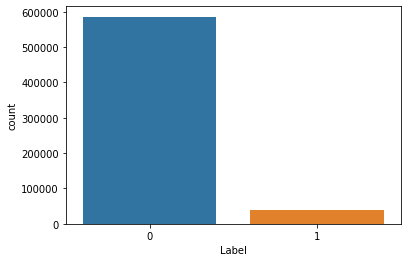

In [ ]:
sns.countplot(x='Label', data=df)

print(df['Flow_Pkts/s'][0])

In [ ]:
list_drop = ['Flow_ID']
df.drop(list_drop, axis=1, inplace=True)

In [5]:
#encoding output class so it's a numerical value
n_df['Label'] = n_df['Label'].astype('category')
encode_map = {
    'Anomaly': 1, 
    'Normal': 0
}

n_df['Label'].replace(encode_map, inplace=True)

In [ ]:

# print(type(df.Label))
# print(type(df.Label[0]))
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,25883,10000,203,10101,17,3496,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,34617,2179,200,554,6,3664,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,25886,52727,200,9020,6,2082,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,25886,52964,200,9020,6,791,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,25881,36763,317,1900,17,1040,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


In [ ]:
#all the inputs
# x = df.iloc[:, 0:]

In [ ]:
df.iloc[:, -3]

0         0
1         0
2         0
3         0
4         0
         ..
625778    0
625779    0
625780    0
625781    1
625782    0
Name: Label, Length: 625783, dtype: int64

In [ ]:
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,...,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,25883,10000,203,10101,17,3496,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,...,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0,2,2
1,34617,2179,200,554,6,3664,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,...,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0,0,0
2,25886,52727,200,9020,6,2082,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,...,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0,4,8
3,25886,52964,200,9020,6,791,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,...,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0,2,4
4,25881,36763,317,1900,17,1040,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,...,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0,2,4


In [6]:
#input
X = n_df.iloc[:, 0:-3]
#output
y = n_df.iloc[:, -3]

# type(y[0])


In [7]:
#distributing datset into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size= 0.33, random_state=69)


In [8]:

#normalization 

#read up on how normalization is done in this 
#case later
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [9]:
#hyperparameters
epochs = 50 
batch_size = 64
learning_rate = 0.001

In [10]:
#training 

#first setting up the dataset loader for 
#batching


#training data
class trainData(Dataset): 
  def __init__(self, X_data, y_data): 
    self.X_data = X_data
    self.y_data = y_data

  def __getitem__(self, index): 
    return self.X_data[index], self.y_data[index]

  def __len__(self): 
    return len(self.X_data)

# creating instance
train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))



# testing data
class testData(Dataset): 
  def __init__(self, X_data): 
    self.X_data = X_data
  
  def __getitem__(self, index): 
    return self.X_data[index]

  def __len__(self): 
    return len(self.X_data)


# creating instance
test_data = testData(torch.FloatTensor(X_test))


In [11]:
train_loader = DataLoader(dataset=train_data, 
batch_size = batch_size, shuffle = True)



In [75]:
test_loader = DataLoader(dataset=test_data, batch_size =1 )

In [67]:
class binaryClassification(nn.Module): 
  def __init__(self): 
    super(binaryClassification, self).__init__()

    self.layer_1 = nn.Linear(77, 64)
    self.layer_2 = nn.Linear(64, 64)
    self.layer_out = nn.Linear(64,1)

    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(64)
    self.batchnorm2 = nn.BatchNorm1d(64)

  def forward(self, inputs): 
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.layer_out(x)

    return x 

In [68]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [69]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [70]:
model = binaryClassification()
model.to(device)

print(model)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

binaryClassification(
  (layer_1): Linear(in_features=77, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [71]:
def binary_acc(y_pred, y_test): 
  y_pred_tag = torch.round(torch.sigmoid(y_pred))

  correct_results_sum = (y_pred_tag ==y_test).sum().float()
  acc = correct_results_sum/y_test.shape[0]
  acc = torch.round(acc*100)

  return acc

In [72]:
model.train()
for e in range(1,epochs+1 ): 
  epoch_loss = 0 
  epoch_acc = 0 
  for X_batch, y_batch in train_loader: 
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    optimizer.zero_grad()
    y_pred = model(X_batch)
    loss = criterion(y_pred, y_batch.unsqueeze(1))
    acc = binary_acc(y_pred, y_batch.unsqueeze(1))

    loss.backward()
    optimizer
    

    epoch_loss += loss.item()
    epoch_acc += acc.item()
  print(f'Epoch {e+0:03}: |loss: {epoch_loss/len(train_loader):.5f} | Acc:{epoch_acc/len(train_loader):.3f}')

Epoch 001: |loss: 0.79968 | Acc:38.895
Epoch 002: |loss: 0.79987 | Acc:38.877
Epoch 003: |loss: 0.79989 | Acc:39.027
Epoch 004: |loss: 0.79996 | Acc:38.882
Epoch 005: |loss: 0.79950 | Acc:38.861
Epoch 006: |loss: 0.79954 | Acc:38.905
Epoch 007: |loss: 0.79958 | Acc:38.994
Epoch 008: |loss: 0.80010 | Acc:38.859
Epoch 009: |loss: 0.79997 | Acc:38.888
Epoch 010: |loss: 0.79954 | Acc:38.976
Epoch 011: |loss: 0.79978 | Acc:38.940
Epoch 012: |loss: 0.79981 | Acc:38.880
Epoch 013: |loss: 0.79970 | Acc:39.011
Epoch 014: |loss: 0.79967 | Acc:38.921
Epoch 015: |loss: 0.79970 | Acc:38.965
Epoch 016: |loss: 0.80019 | Acc:38.929
Epoch 017: |loss: 0.79998 | Acc:38.835
Epoch 018: |loss: 0.79948 | Acc:38.924
Epoch 019: |loss: 0.79994 | Acc:38.837
Epoch 020: |loss: 0.79999 | Acc:38.915
Epoch 021: |loss: 0.79958 | Acc:38.942
Epoch 022: |loss: 0.79970 | Acc:38.918
Epoch 023: |loss: 0.79989 | Acc:38.861
Epoch 024: |loss: 0.79970 | Acc:38.900
Epoch 025: |loss: 0.80033 | Acc:38.927
Epoch 026: |loss: 0.79998

In [73]:
n_df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Bwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean.1,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,Mirai,Mirai-Ackflooding
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,DoS,DoS-Synflooding
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,Scan,Scan Port OS
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,Mirai,Mirai-Hostbruteforceg
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,Mirai,Mirai-Hostbruteforceg


In [76]:
y_pred_list = []

model.eval()

with torch.no_grad(): 
  for X_batch in test_loader: 
    X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    y_test_pred = torch.sigmoid(y_test_pred)
    y_pred_tag = torch.round(y_test_pred)
    y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist()for a in y_pred_list]

In [77]:
confusion_matrix(y_test, y_pred_list)

array([[  8681,   4440],
       [115778,  77610]])

In [78]:
print (classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.07      0.66      0.13     13121
           1       0.95      0.40      0.56    193388

    accuracy                           0.42    206509
   macro avg       0.51      0.53      0.34    206509
weighted avg       0.89      0.42      0.54    206509

